# 선형 모델(Linear Models)

* 선형 모델은 과거 부터 지금 까지 널리 사용되고 연구 되고 있는 기계학습 방법
* 선형 모델은 입력 데이터에 대한 선형 함수를 만들어 예측 수행

* 회귀 분석을 위한 선형 모델은 다음과 같이 정의

\begin{equation}
\hat{y}(w,x) = w_0 + w_1 x_1 + ... + w_p x_p
\end{equation}

  + $x$: 입력 데이터
  + $w$: 모델이 학습할 파라미터
  + $w_0$: 편향
  + $w_1$~$w_p$: 가중치


## 선형 회귀(Linear Regression)

* **선형 회귀(Linear Regression)**또는 **최소제곱법(Ordinary Least Squares)**은 가장 간단한 회귀 분석을 위한 선형 모델
* 선형 회귀는 모델의 예측과 정답 사이의 **평균제곱오차(Mean Squared Error)**를 최소화 하는 학습 파라미터 $w$를 찾음
* 평균제곱오차는 아래와 같이 정의

\begin{equation}
MSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2
\end{equation}

  + $y$: 정답
  + $\hat{y}$: 예측 값을 의미

* 선형 회귀 모델에서 사용하는 다양한 오류 측정 방법
  + MAE(Mean Absoulte Error)
  + MAPE(Mean Absolute Percentage Error)
  + MSE(Mean Squared Error)
  + MPE(Mean Percentage Error)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

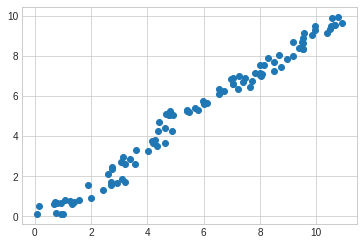

In [ ]:
noise = np.random.rand(100,1)
X = sorted(10 * np.random.rand(100,1)) + noise
y = sorted(10 * np.random.rand(100))
plt.scatter(X,y)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #X,y차원 맞춰줘야함
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('선형 회귀 가중치: {}'.format(model.coef_))
print('선형 회귀 편향: {}'.format(model.intercept_))

선형 회귀 가중치: [0.94953639]
선형 회귀 편향: -0.2924730024844715


In [ ]:
print('학습 데이터 점수(R squared): {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수(R squared): {}'.format(model.score(X_test, y_test)))

학습 데이터 점수(R squared): 0.9806642672212224
평가 데이터 점수(R squared): 0.988042153838981


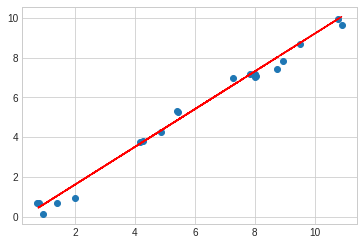

In [ ]:
predict = model.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, predict , '--r')
plt.show()

### 보스턴 주택 가격 데이터

* 주택 가격 데이터는 도시에 대한 분석과 부동산, 경제적인 정보 분석 등 많은 활용 가능한 측면들이 존재
* 보스턴 주택 가격 데이터는 카네기 멜론 대학교에서 관리하는 StatLib 라이브러리에서 가져온 것
* 헤리슨(Harrison, D.)과 루빈펠트(Rubinfeld, D. L.)의 논문 "Hedonic prices and the demand for clean air', J. Environ. Economics & Management"에서 보스턴 데이터가 사용
* 1970년도 인구 조사에서 보스턴의 506개 조사 구역과 주택 가격에 영향을 주는 속성 21개로 구성

| 속성 | 설명 |
|------|------|
| CRIM | 자치시(town)별 1인당 범죄율 |
| ZN | 25,000 평방 피트가 넘는 거주지역 토지 비율 |
| INDUS | 자치시(town)별 비소매 상업지역 토지 비율 |
| CHAS | 찰스 강(Charles River)에 대한 변수 (강의 경계에 위치하면 1, 그렇지 않으면 0) |
| NOX | 10,000,000당  일산화질소 농도 |
| RM | 주택 1가구당 평균 방의 수 |
| AGE | 1940년 이전에 건축된 소유주택 비율 |
| DIS | 5개의 보스턴 고용 센터까지의 가중 거리 |
| RAD | 방사형 고속도로 접근성 지수 |
| TAX | 10,000 달러당 재산 세율 |
| PTRATIO | 자치시(town)별 학생/교사 비율 |
| B | 1000(Bk-0.63)^2, Bk: 자치시별 흑인 비율 |
| LSTAT | 모집단의 하위계층 비율(%) |
| MEDV | 소유자가 거주하는 주택가격(중앙값) (단위: 1,000 달러) |

In [ ]:
#Boston dataset 삭제됨 .. 

from sklearn import datasets
X, y = datasets.fetch_openml('boston', return_X_y=True)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
import pandas as pd

boston_data = X.copy()
boston_target = y.copy()
boston_df = pd.DataFrame(boston_data)
boston_df.insert(loc = 0, column = 'MEDV', value = y.copy()) #첫번째 열에 column 삽입
boston_df.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [ ]:
boston_df.describe()

,MEDV,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063
std,9.197104,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000
50%,21.200000,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000
75%,25.000000,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000
max,50.000000,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000


### 보스턴 주택 가격에 대한 선형 회귀

In [ ]:
X.info() #category는 선형회귀에서 사용못함..

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
dtypes: category(2), float64(11)
memory usage: 45.1 KB


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X) # MinMax scaling을 통해 category데이터 타입을 바꿔준다

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2)
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.7256505962716828
평가 데이터 점수 : 0.7942192236315758


* 데이터를 두개로 분리하고 모델을 생성 및 검증하였지만, 데이터를 분리하였기 때문에 훈련에 사용할 수 있는 양도 작아지고, 분리가 잘 안된 경우에는 잘못된 검증이 될 수 있음
* 이럴 경우에는 테스트셋을 여러개로 구성하여 교차 검증을 진행
* `cross_val_score()` 함수는 교차 검증을 수행하여 모델을 검증
* 다음 예제에서는 모델 오류를 측정하는 점수로 NMSE(Negative Mean Squared Error)를 사용

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_scaled, y, cv = 10, scoring = 'neg_mean_squared_error')
print('NMSE scores :{}'.format(scores))
print('NMSE scores mean : {}'.format(scores.mean()))
print('NMSE scores std : {}'.format(scores.std()))

NMSE scores :[  -9.28694671  -14.15128316  -14.07360615  -35.20692433  -31.88511666
  -19.83587796   -9.94726918 -168.37537954  -33.32974507  -10.96041068]
NMSE scores mean : -34.70525594452478
NMSE scores std : 45.57399920030867


* 회귀모델의 검증을 위한 또 다른 측정 지표 중 하나로 결정 계수(coefficient of determination, $R^2$) 사용
  + $R^2$ 값은 음수가 나올수 있다.
  + 추정된 회귀식의 오차가 평균값으로 추정한 편차보다 클때 음수가 나올 수 있다.

In [ ]:
r2_scores = cross_val_score(model, X_scaled, y, cv = 10, scoring = 'r2')
print('R2 scores : {}'.format(r2_scores))

R2 scores : [ 0.73376082  0.4730725  -1.00631454  0.64113984  0.54766046  0.73640292
  0.37828386 -0.12922703 -0.76843243  0.4189435 ]


생성된 회귀 모델에 대해서 평가를 위해 LinearRegression 객체에 포함된 두 개의 속성 값을 통해 수식을 표현
* intercept_: 추정된 상수항
* coef_: 추정된 가중치 벡터

In [ ]:
print('constant = ' + str(model.intercept_) + ' ')
for i, c in enumerate(model.coef_):
  print(str(c) + ' * x' + str(i))

constant = 27.99777098680174 
-10.475248802817198 * x0
3.4714317428333006 * x1
-0.1089209976373815 * x2
3.0009477546986485 * x3
-8.916597056914656 * x4
18.843272816795338 * x5
1.2692746744565042 * x6
-15.032256461033624 * x7
6.8562659067950475 * x8
-5.944542268784177 * x9
-9.8572627483427 * x10
2.980295007472877 * x11
-19.508855389048826 * x12


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

tr_predict = model.predict(X_train)
tr_rmse = np.sqrt(mean_squared_error(y_train, tr_predict))
tr_r2 = r2_score(y_train, tr_predict)

print('train RMSE : {}'.format(tr_rmse))
print('train R2 score : {}\n'.format(tr_r2))

ts_predict = model.predict(X_test)
ts_rmse = np.sqrt(mean_squared_error(y_test, ts_predict))
ts_r2 = r2_score(y_test, ts_predict)

print('test RMSE : {}'.format(ts_rmse))
print('test R2 score : {}'.format(ts_r2))

train RMSE : 4.877869652357796
train R2 score : 0.7256505962716828

test RMSE : 3.913661152572199
test R2 score : 0.7942192236315758


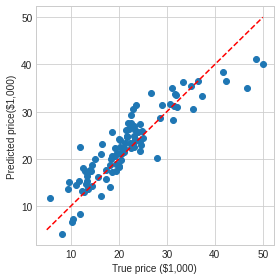

In [ ]:
def plot_boston_prices(expected, predicted):
  plt.figure(figsize = (4,4))
  plt.scatter(expected, predicted)
  plt.plot([5,50],[5,50], '--r')
  plt.xlabel('True price ($1,000)')
  plt.ylabel('Predicted price($1,000)')
  plt.tight_layout()
  plt.show()

predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

### 캘리포니아 주택 가격 데이터

| 속성 | 설명 |
|------|------|
| MedInc | 블록의 중간 소득 |
| HouseAge | 블록의 중간 주택 연도 |
| AveRooms | 자치시(town)별 비소매 상업지역 토지 비율 |
| AveBedrms | 찰스 강(Charles River)에 대한 변수 (강의 경계에 위치하면 1, 그렇지 않으면 0) |
| Population | 10,000,000당  일산화질소 농도 |
| AveOccup | 주택 1가구당 평균 방의 수 |
| Latitude | 1940년 이전에 건축된 소유주택 비율 |
| Longitude | 5개의 보스턴 고용 센터까지의 가중 거리 |

In [ ]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
print(california.keys())
print(california.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
ex

In [ ]:
import pandas as pd

california_df = pd.DataFrame(california.data, columns = california.feature_names)
california_df.insert(0, column = 'Target', value = california.target)
california_df.head()

,Target,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.526,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,3.585,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,3.521,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,3.413,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.422,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
california_df.describe()

,Target,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,2.068558,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.153956,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.149990,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,1.196000,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,1.797000,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,2.647250,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,5.000010,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [ ]:
import matplotlib.pyplot as plt

for i, col in enumerate(california_df.columns):
  plt.figure(figsize=(8,4))
  plt.plot(california_df[col].sort_values().reset_index(drop=True))
  plt.title(col)
  plt.tight_layout()
  plt.show()

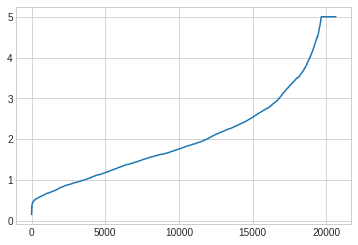

In [ ]:
plt.plot(california_df['Target'].sort_values().reset_index(drop=True))

In [ ]:
for i, col in enumerate(california_df.columns):
  plt.figure(figsize=(8,4))
  plt.scatter(california_df[col], california_df['Target'])
  plt.ylabel('Target', size = 12)
  plt.xlabel(col, size = 12)
  plt.tight_layout()
  plt.show()

DataFrame.sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None, ignore_index=False)


In [ ]:
import seaborn as sns

sns.pairplot(california_df.sample(1000))

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

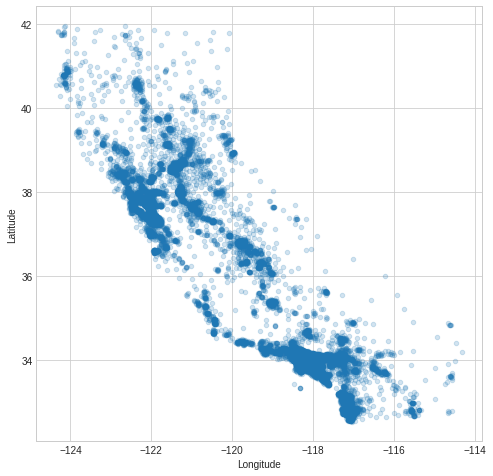

In [ ]:
california_df.plot(kind = 'scatter', x = 'Longitude', y = 'Latitude', alpha = 0.2, figsize = (8,8))

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

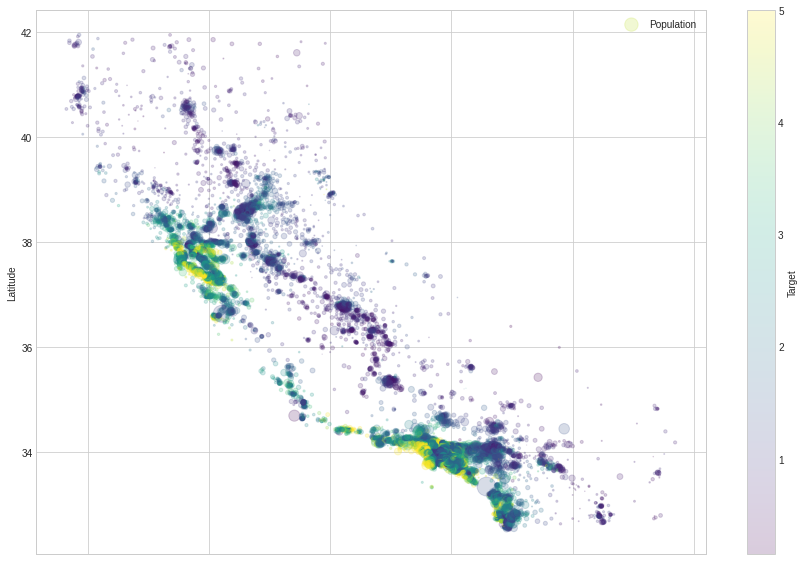

In [ ]:
california_df.plot(kind = 'scatter', x = 'Longitude', y = 'Latitude', alpha = 0.2, figsize = (15,10),
                   s = california_df['Population']/100, label = 'Population', 
                   c = 'Target', cmap = plt.get_cmap('viridis'), colorbar = True)


### 캘리포니아 주택 가격에 대한 선형 회귀

* 정규화나 표준화는 데이터 분리후 진행해야한다.
* 데이터 분리후 train test set을 각각 정규화를 진행한다
  + 이때 test set의 정규화 기준은 train set의 정규화 기준으로 사용해야한다.
  + normalize test set by using train set's min max sclaer

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size = 0.2, random_state=10)

scaler = MinMaxScaler()
X_tr_scaled = scaler.fit_transform(X_train) #train set normalize
X_ts_scaled = scaler.transform(X_test) #test set normalize by using train sclaer

model = LinearRegression()
model.fit(X_tr_scaled, y_train)

print('학습데이터 점수 : {}'.format(model.score(X_tr_scaled, y_train)))
print('검정데이터 점수 : {}'.format(model.score(X_ts_scaled, y_test)))

학습데이터 점수 : 0.607404930502105
검정데이터 점수 : 0.6009790143129108


In [ ]:
# 파이프라인을 이용해서 데이터 스케일링(위와 완전 동일한 결과를 보야준다.)
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(MinMaxScaler(), LinearRegression())
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size = 0.2, random_state= 10)
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

print('학습데이터 점수 : {}'.format(pipe.score(X_train, y_train)))
print('검정데이터 점수 : {}'.format(pipe.score(X_test, y_test)))

학습데이터 점수 : 0.607404930502105
검정데이터 점수 : 0.6009790143129108


In [ ]:
print('y = ' + str(model.intercept_) + ' ')
for i, c in enumerate(model.coef_):
  print(str(c) + '*x' + str(i))

y = 3.7921101281238654 
6.280069797612472*x0
0.4755050499792238*x1
-14.153266876995268*x2
20.75339352028007*x3
-0.0910209199594321*x4
-2.8644067865330265*x5
-4.03761794756513*x6
-4.432501662365706*x7


In [ ]:
from sklearn.metrics import mean_squared_error

y_test_predict = model.predict(X_ts_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2 = r2_score(y_test, y_test_predict)

print('RMSE : {}'.format(rmse))
print('R2 Score : {}'.format(r2))

RMSE : 0.7378917347506253
R2 Score : 0.6009790143129108


In [ ]:
#파이프라인을 이용한 RMSE, R2 score(위와 완전 동일)

from sklearn.metrics import mean_squared_error

y_test_predict = pipe.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2 = r2_score(y_test, y_test_predict)

print('RMSE : {}'.format(rmse))
print('R2 Score : {}'.format(r2))

RMSE : 0.7378917347506253
R2 Score : 0.6009790143129108


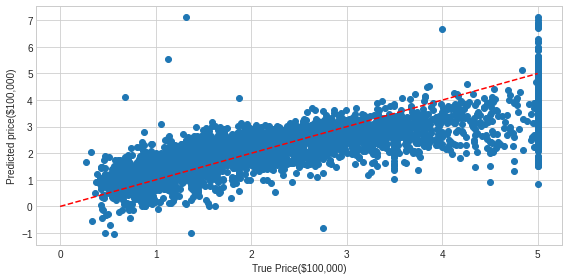

In [ ]:
def plot_california_prices(expected, predicted):
  plt.figure(figsize = (8,4))
  plt.scatter(expected, predicted)
  plt.plot([0,5],[0,5], '--r')
  plt.xlabel('True Price($100,000)')
  plt.ylabel('Predicted price($100,000)')
  plt.tight_layout()

predicted, expected = pipe.predict(X_test), y_test
plot_california_prices(expected, predicted)

## 릿지 회귀(Ridge Regression)

* 릿지 회귀는 선형 회귀를 개선한 선형 모델
* 릿지 회귀는 선형 회귀와 비슷하지만, 가중치의 절대값을 최대한 작게 만든다는 것이 다름
* 이러한 방법은 각각의 특성(feature)이 출력 값에 주는 영향을 최소한으로 만들도록 규제(regularization)를 거는 것
* 규제를 사용하면 다중공선성(multicollinearity) 문제를 방지하기 때문에 모델의 과대적합을 막을 수 있게 됨
* 다중공선성 문제는 두 특성이 일치에 가까울 정도로 관련성(상관관계)이 높을 경우 발생
* 릿지 회귀는 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

\begin{equation}
RidgeMSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} w_i^2
\end{equation}

  + $\alpha$: 사용자가 지정하는 매개변수
  + $\alpha$가 크면 규제의 효과가 커지고, $\alpha$가 작으면 규제의 효과가 작아짐
  + 단 파라미터를 찾기전 데이터셋의 scaling이 필요하다

### 보스턴 주택 가격에 대한 릿지 회귀

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# 1. load dataset

X, y = datasets.fetch_openml('boston', return_X_y=True)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
# 2. train, test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2023)

In [ ]:
# 3. make pipeline

pipe = make_pipeline(StandardScaler(), Ridge(alpha = 1))

In [ ]:
# 4. fit model

pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=1))])

In [ ]:
print('학습 데이터 점수 : {}'.format(pipe.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(pipe.score(X_test, y_test)))

학습 데이터 점수 : 0.7214448836316845
평가 데이터 점수 : 0.7919215603228369


In [ ]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'ridge', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'ridge__alpha', 'ridge__copy_X', 'ridge__fit_intercept', 'ridge__max_iter', 'ridge__positive', 'ridge__random_state', 'ridge__solver', 'ridge__tol'])

In [ ]:
from sklearn.model_selection import GridSearchCV

alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param = dict(ridge__alpha = alpha)

gs = GridSearchCV(estimator = pipe, param_grid = param, cv = 10)
res = gs.fit(X_train, y_train)
df_cv_scores=pd.DataFrame(gs.cv_results_).sort_values(by='rank_test_score')
df_cv_scores[['rank_test_score', 'mean_test_score', 'params']]

,rank_test_score,mean_test_score,params
4,1,0.667398,{'ridge__alpha': 10}
3,2,0.665723,{'ridge__alpha': 1}
2,3,0.665384,{'ridge__alpha': 0.1}
1,4,0.665348,{'ridge__alpha': 0.01}
0,5,0.665344,{'ridge__alpha': 0.001}
5,6,0.654529,{'ridge__alpha': 100}
6,7,0.473284,{'ridge__alpha': 1000}


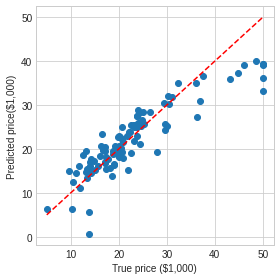

In [ ]:
predicted = gs.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

* 릿지 회귀는 가중치에 제약을 두기 때문에 선형 회귀 모델보다 훈련 데이터 점수가 낮을 수 있음
* 일반화 성능은 릿지 회귀가 더 높기 때문에 평가 데이터 점수는 릿지 회귀가 더 좋음

* 일반화 성능에 영향을 주는 매개 변수인 $\alpha$ 값을 조정해 보면서 릿지 회귀 분석의 성능이 어떻게 변하는지 확인 필요

### 캘리포니아 주택 가격에 대한 릿지 회귀

In [ ]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline

c
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size = 0.2, random_state = 2023)

pipe = make_pipeline(StandardScaler(), Ridge())
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'ridge', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'ridge__alpha', 'ridge__copy_X', 'ridge__fit_intercept', 'ridge__max_iter', 'ridge__positive', 'ridge__random_state', 'ridge__solver', 'ridge__tol'])

In [ ]:
alpha = [0.01, 0.1, 1, 10, 100]
param_grid = dict(ridge__alpha = alpha)

gs = GridSearchCV(pipe, param_grid = param_grid, cv = 5)
gs.fit(X_train, y_train)
print(gs.best_estimator_)

print('학습 데이터 점수 : {}'.format(gs.score(X_train, y_train)))
print('학습 데이터 점수 : {}'.format(gs.score(X_test, y_test)))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=10))])
학습 데이터 점수 : 0.6030457564594915
학습 데이터 점수 : 0.6173058661647699


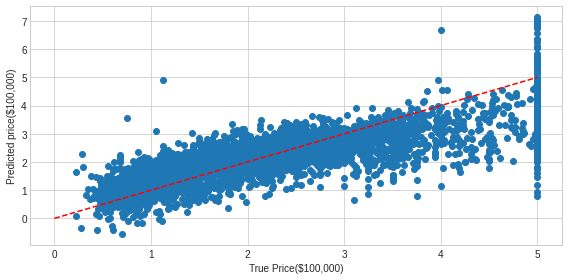

In [ ]:
predicted = gs.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

## 라쏘 회귀(Lasso Regression)

* 선형 회귀에 규제를 적용한 또 다른 모델로 라쏘 회귀가 있음
* 라쏘 회귀는 릿지 회귀와 비슷하게 가중치를 0에 가깝게 만들지만(0을 만들 수 있다), 조금 다른 방식을 사용

* 라쏘 회귀에서는 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

\begin{equation}
LassoMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} |w_i|
\end{equation}

* 라쏘 회귀도 매개변수인 $\alpha$ 값을 통해 규제의 강도 조절 가능

### 보스턴 주택 가격에 대한 라쏘 회귀

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline


X, y = datasets.fetch_openml('boston', return_X_y=True)
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.2, random_state = 2023)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
pipe_line = make_pipeline(StandardScaler(), Lasso())
pipe_line.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'lasso', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'lasso__alpha', 'lasso__copy_X', 'lasso__fit_intercept', 'lasso__max_iter', 'lasso__positive', 'lasso__precompute', 'lasso__random_state', 'lasso__selection', 'lasso__tol', 'lasso__warm_start'])

In [ ]:
alpha = [0.01, 0.1, 1, 10, 100]
param_grid = {'lasso__alpha' : alpha}
gs = GridSearchCV(pipe_line, param_grid = param_grid, cv = 5)
gs.fit(train_X, train_y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': [0.01, 0.1, 1, 10, 100]})

In [ ]:
res_df = pd.DataFrame(gs.cv_results_).sort_values("rank_test_score")
res_df[['rank_test_score','params', 'mean_test_score']]

,rank_test_score,params,mean_test_score
0,1,{'lasso__alpha': 0.01},0.674053
1,2,{'lasso__alpha': 0.1},0.670246
2,3,{'lasso__alpha': 1},0.614523
3,4,{'lasso__alpha': 10},-0.011441
4,4,{'lasso__alpha': 100},-0.011441


In [ ]:
print('학습데이터 점수: {}'.format(gs.score(train_X, train_y)))
print('훈련데이터 점수: {}'.format(gs.score(test_X, test_y)))

학습데이터 점수: 0.7213947676422574
훈련데이터 점수: 0.7909068945667403


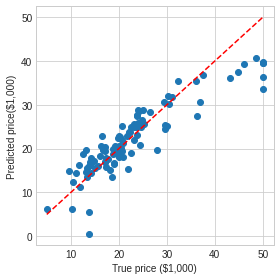

In [ ]:
predicted = gs.predict(test_X)
expected = test_y

plot_boston_prices(expected, predicted)

### 캘리포니아 주택 가격에 대한 라쏘 회귀

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size = 0.2, random_state = 2023)
pipeline = make_pipeline(StandardScaler(), Lasso())

alpha = [0.01, 0.1, 1, 10, 100]
param_grid = {'lasso__alpha': alpha}

gs = GridSearchCV(pipeline, param_grid = param_grid, cv = 5)
gs.fit(X_train, y_train)

res_df = pd.DataFrame(gs.cv_results_).sort_values("rank_test_score")
res_df[['rank_test_score','params', 'mean_test_score']]

,rank_test_score,params,mean_test_score
0,1,{'lasso__alpha': 0.01},0.595681
1,2,{'lasso__alpha': 0.1},0.494439
2,3,{'lasso__alpha': 1},-0.000526
3,3,{'lasso__alpha': 10},-0.000526
4,3,{'lasso__alpha': 100},-0.000526


In [ ]:
print('학습데이터 점수: {}'.format(gs.score(X_train, y_train)))
print('훈련데이터 점수: {}'.format(gs.score(X_test, y_test)))

In [ ]:
predicted = gs.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

## 신축망 (Elastic-Net)

* 신축망은 릿지 회귀와 라쏘 회귀, 두 모델의 모든 규제를 사용하는 선형 모델
* 두 모델의 장점을 모두 갖고 있기 때문에 좋은 성능을 보임
* 데이터 특성이 많거나 서로 상관 관계가 높은 특성이 존재 할 때 위의 두 모델보다 좋은 성능을 보여 줌

* 신축망은 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

\begin{equation}
ElasticMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i) + \alpha \rho \sum_{i=1}^{p} |w_i| + \alpha (1 - \rho) \sum_{i=1}^{p} w_i^2
\end{equation}

  + $\alpha$: 규제의 강도를 조절하는 매개변수
  + $\rho$: 라쏘 규제와 릿지 규제 사이의 가중치를 조절하는 매개변수

### 보스턴 주택 가격에 대한 신축망

In [ ]:
from sklearn import datasets
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline


X, y = datasets.fetch_openml('boston', return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 2023)

In [ ]:
pipe_line = make_pipeline(StandardScaler(), ElasticNet())
pipe_line.get_params().keys()

In [ ]:
param_dict = {"elasticnet__alpha" : [0.01, 0.1, 1, 10, 100],
              'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]}

gs = GridSearchCV(pipe_line, param_grid = param_dict, cv = 5)
gs.fit(X_train, y_train)

In [ ]:
import pandas as pd

res_df = pd.DataFrame(gs.cv_results_).sort_values("rank_test_score")
res_df[['rank_test_score','param_elasticnet__alpha', 'param_elasticnet__l1_ratio', 'mean_test_score']].head()

In [ ]:
print('학습데이터 점수: {}'.format(gs.score(X_train, y_train)))
print('훈련데이터 점수: {}'.format(gs.score(X_test, y_test)))

### 캘리포니아 주택 가격에 대한 신축망

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size = 0.2, random_state = 2023)
pipeline = make_pipeline(StandardScaler(), ElasticNet())

param_dict = {"elasticnet__alpha" : [0.01, 0.1, 1, 10, 100],
              'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]}

gs = GridSearchCV(pipe_line, param_grid = param_dict, cv = 5)
gs.fit(X_train, y_train)


res_df = pd.DataFrame(gs.cv_results_).sort_values("rank_test_score")
res_df[['rank_test_score','param_elasticnet__alpha', 'param_elasticnet__l1_ratio', 'mean_test_score']].head()

In [ ]:
print('학습데이터 점수: {}'.format(gs.score(X_train, y_train)))
print('훈련데이터 점수: {}'.format(gs.score(X_test, y_test)))

## 직교 정합 추구 (Orthogonal Matching Pursuit)

* 직교 정합 추구 방법은 모델에 존재하는 가중치 벡터에 특별한 제약을 거는 방법

* 직교 정합 추구 방법은 다음을 만족하는 파라미터 $w$를 찾는것이 목표

\begin{equation}
\underset{w}{\arg \min} \; ||y - \hat{y}||^2_2 \; subject \; to \; ||w||_0 \leq k
\end{equation}

  + $||w||_0$: 가중치 벡터 $w$에서 0이 아닌 값의 개수

* 직교 정합 추구 방법은 가중치 벡터 $w$에서 0이 아닌 값이 $k$개 이하가 되도록 훈련됨
* 이러한 방법은 모델이 필요 없는 데이터 특성을 훈련 과정에서 자동으로 제거 하도록 만들 수 있음

### 보스턴 주택 가격에 대한 직교 정합 추구

In [ ]:
from sklearn import datasets
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline


X, y = datasets.fetch_openml('boston', return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 2023)

In [ ]:
pipe_line = make_pipeline(StandardScaler(), OrthogonalMatchingPursuit())
pipe_line.get_params().keys()

In [ ]:
param_dict = {'orthogonalmatchingpursuit__n_nonzero_coefs': [5,6,7,8,9]}
gs = GridSearchCV(pipe_line, param_grid = param_dict, cv = 5)
gs.fit(X_train, y_train) 

In [ ]:
res_df = pd.DataFrame(gs.cv_results_).sort_values("rank_test_score")
res_df[['rank_test_score','params', 'mean_test_score']].head()

In [ ]:
print('학습데이터 점수: {}'.format(gs.score(X_train, y_train)))
print('훈련데이터 점수: {}'.format(gs.score(X_test, y_test)))

* 직교 정합 추구 방법은 위에서 설명한 제약 조건 대신에 다음 조건을 만족하도록 변경 가능

\begin{equation}
\underset{w}{\arg \min} \; ||w||_0 \; subject \; to \; ||y - \hat{y}||^2_2 \leq tol
\end{equation}

  + $||y - \hat{y}||^2_2$는 $\sum_{i=1}^N (y - \hat{y})^2$와 같은 의미

* 위의 식을 통해서 직교 정합 추구 방법을 $y$와 $\hat{y}$ 사이의 오차 제곱 합을 $tol$ 이하로 하면서 $||w||_0$를 최소로 하는 모델로 대체 가능

In [ ]:
param_dict = {'orthogonalmatchingpursuit__n_nonzero_coefs': [5,6,7,8,9],
              'orthogonalmatchingpursuit__tol' : [1]}
gs = GridSearchCV(pipe_line, param_grid = param_dict, cv = 5)
gs.fit(X_train, y_train) 

In [ ]:
print('학습데이터 점수: {}'.format(gs.score(X_train, y_train)))
print('훈련데이터 점수: {}'.format(gs.score(X_test, y_test)))

## 다항 회귀 (Polynomial Regression)

* 입력 데이터를 비선형 변환 후 사용하는 방법
* 모델 자체는 선형 모델

\begin{equation}
\hat{y} = w_1 x_1 + w_2 x_2 + w_3 x_3 + w_4 x_2^2 + w_5 x_3^2
\end{equation}

* 차수가 높아질수록 더 복잡한 데이터 학습 가능


### 보스턴 주택 가격에 대한 다항 회귀

In [ ]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline


X, y = datasets.fetch_openml('boston', return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 2023)

In [ ]:
pipe_line = make_pipeline(StandardScaler(), 
                          PolynomialFeatures(degree = 2), 
                          LinearRegression())
pipe_line.fit(X_train, y_train)

In [ ]:
print('학습 데이터 점수 : {}'.format(pipe_line.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(pipe_line.score(X_test, y_test)))

## 참고문헌

* scikit-learn 사이트: https://scikit-learn.org/
* Jake VanderPlas, "Python Data Science Handbook", O'Reilly
* Sebastian Raschka, Vahid Mirjalili, "Python Machine Learning", Packt
* Giuseppe Bonaccorso, "Machine Learning Algorithm", Packt
* Aurelien Geron, "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems", O'Reilly